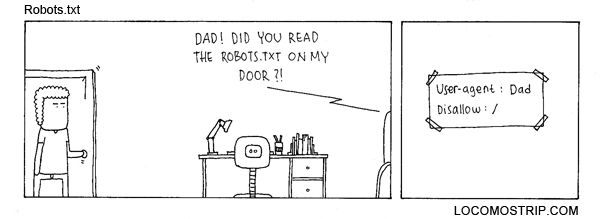

<h1>S10 T01: Web scraping and automation</h1>

<h2>Libraries</h2>

In [1]:
#Python library 
import requests
from urllib.request import urlopen
import time
import re
import shutil
from datetime import date
 
#Web Scraping
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver import Chrome
#from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import scrapy
from scrapy.crawler import CrawlerProcess
import os

#Data Manipulation
import pandas as pd
import nltk

#Document creation
#from docx import Document
#from docx.shared import Inches
#from docx import text
#from docx.shared import Pt
#from docx.enum.table import WD_TABLE_ALIGNMENT
#from docx.enum.text import WD_LINE_SPACING 
#from docx.enum.text import WD_ALIGN_PARAGRAPH

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.image as img


<h2>Exercise 1</h2>

**Perform web scraping of two of the three proposed web pages using BeautifulSoup first and Selenium later.**

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (do some search first and scrape some content)

<h3>Bolsa de Madrid</h3>

<h4>Beautiful Soup</h4>

In [2]:
#url of the webpage
url_bolsa = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000" 

In [3]:
#fetch the webpage
web_page =  urlopen(url_bolsa)

In [4]:
#get the webpage content
content = BeautifulSoup(web_page.read(), 'html.parser')

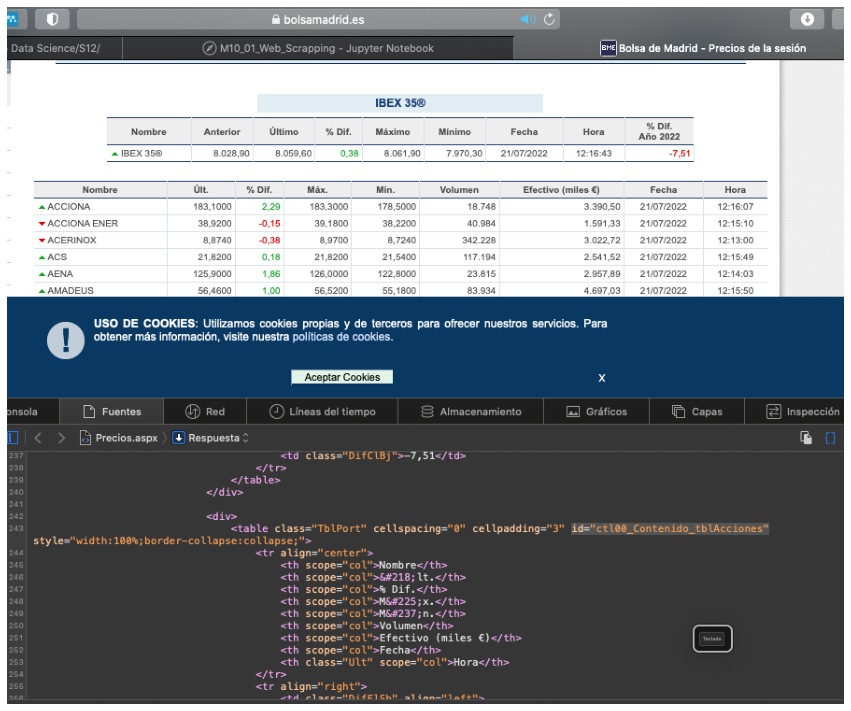

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
fig = img.imread('table_SC.png')
plt.imshow(fig)
plt.axis('off')
plt.show()

When you look the source code of the page you can find the id of the element that you want to scrap, in this case is a table with id="ctl00_Contenido_tblAcciones".  

In [6]:
#get the table by id 
table_stocks = content.find(id="ctl00_Contenido_tblAcciones") 
table_stocks 

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Últ.</th><th scope="col">% Dif.</th><th scope="col">Máx.</th><th scope="col">Mín.</th><th scope="col">Volumen</th><th scope="col">Efectivo (miles €)</th><th scope="col">Fecha</th><th class="Ult" scope="col">Hora</th>
</tr><tr align="right">
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">ACCIONA</a></td><td>187,4000</td><td class="DifClSb">1,46</td><td>188,7000</td><td>184,4000</td><td>47.640</td><td>8.927,51</td><td align="center">25/07/2022</td><td align="center" class="Ult">15:02:12</td>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105563003">ACCIONA ENER</a></td><td>39,1400</td><td class="DifClBj">-0,81</td><td>39,8400</td><td>38,9000</td><td>68.077</td><td>2.665,83</td><td align="center">25/07/2022</td><td al

In [7]:
#get the headers of the table
cols= table_stocks.find_all('th')
cols

[<th scope="col">Nombre</th>,
 <th scope="col">Últ.</th>,
 <th scope="col">% Dif.</th>,
 <th scope="col">Máx.</th>,
 <th scope="col">Mín.</th>,
 <th scope="col">Volumen</th>,
 <th scope="col">Efectivo (miles €)</th>,
 <th scope="col">Fecha</th>,
 <th class="Ult" scope="col">Hora</th>]

In [8]:
#get the text
table_cols  = []

for c in cols:
    table_cols.append(c.get_text())

table_cols

['Nombre',
 'Últ.',
 '% Dif.',
 'Máx.',
 'Mín.',
 'Volumen',
 'Efectivo (miles €)',
 'Fecha',
 'Hora']

In [9]:
#get the content of the table
rows= table_stocks.find_all('td')

table_rows = []

for row in rows:
    table_rows.append(row.text)

table_rows[:9]  


['ACCIONA',
 '187,4000',
 '1,46',
 '188,7000',
 '184,4000',
 '47.640',
 '8.927,51',
 '25/07/2022',
 '15:02:12']

In [10]:
#slice the text for every 9 elements that is a row
observations = {}

for i in range(9):
    observations[table_cols[i]] = table_rows[i::9] 

In [11]:
#transform to DF
table_df = pd.DataFrame(observations)
table_df 

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"187,4000","1,46","188,7000","184,4000",47.640,"8.927,51",25/07/2022,15:02:12
1,ACCIONA ENER,"39,1400","-0,81","39,8400","38,9000",68.077,"2.665,83",25/07/2022,14:59:41
2,ACERINOX,"8,9460","0,56","8,9840","8,7720",333.136,"2.967,96",25/07/2022,15:02:04
3,ACS,"22,4300","0,95","22,4400","22,1700",154.285,"3.445,68",25/07/2022,15:01:55
4,AENA,"124,4000","-0,88","126,2000","123,9000",28.361,"3.548,70",25/07/2022,15:02:08
5,AMADEUS,"56,3400","0,61","56,4000","55,4000",140.394,"7.848,13",25/07/2022,15:00:20
6,ARCELORMIT.,"23,0300","0,02","23,0600","22,4700",102.196,"2.338,25",25/07/2022,15:02:16
7,B.SANTANDER,"2,4550","0,90","2,4720","2,4170",22.921.411,"55.889,51",25/07/2022,15:01:43
8,BA.SABADELL,"0,6548","3,94","0,6550","0,6274",15.100.114,"9.733,25",25/07/2022,15:02:09
9,BANKINTER,"4,9790","2,94","4,9850","4,8110",1.914.162,"9.395,53",25/07/2022,15:02:02


In [12]:
# Save dataframe to CSV
table_df.to_csv('IBEX35_table.csv') 

<h4>Selenium</h4>

In [13]:
#install chromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

/var/folders/sq/fggxzcn90p73_7hm62_tglm40000gn/T/ipykernel_15722/4030892497.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [14]:
#get the url through the driver
driver.get( "https://www.bolsamadrid.es/ing/aspx/Mercados/Precios.aspx?indice=ESI100000000"  )

In [15]:
#to emulate a human behaviour  
time.sleep(5)

In [16]:
#Xpath of the elements table
header_Xpath = '//*[@id="ctl00_Contenido_tblAcciones"]/tbody/tr[1]/th'  
rows_Xpath = '//*[@id="ctl00_Contenido_tblAcciones"]/tbody/tr'  

In [17]:
#scrap the header 
header_selenium = []
for content in driver.find_elements(by=By.XPATH, value=header_Xpath):
    header_selenium.append(content.text)

In [18]:
header_selenium

['Name',
 'Last',
 '% Dif.',
 'High',
 'Low',
 'Volume',
 'Turnover (€ Thousands)',
 'Date',
 'Time']

In [19]:
time.sleep(5)

In [20]:
#find the record rows with Xpath
Xpath_rows_content = driver.find_elements(by=By.XPATH, value=rows_Xpath)

In [21]:
time.sleep(5)

In [22]:
#made the list with the records by stock
row_selenium = []

for row in Xpath_rows_content[1:]:
    element = []
    values = row.find_elements(By.XPATH, "td")
    for v in values:
        element.append(v.text)
    row_selenium.append(element)
    

In [23]:
#transform to dataframe
df_shares_selenium = pd.DataFrame(row_selenium, columns=header_selenium)
df_shares_selenium

,Name,Last,% Dif.,High,Low,Volume,Turnover (€ Thousands),Date,Time
0,ACCIONA,187.4000,1.46,188.7000,184.4000,"47,640","8,927.51",25/07/2022,15:02:12
1,ACCIONA ENER,39.1400,-0.81,39.8400,38.9000,"68,077","2,665.83",25/07/2022,14:59:41
2,ACERINOX,8.9460,0.56,8.9840,8.7720,"333,136","2,967.96",25/07/2022,15:02:04
3,ACS,22.4300,0.95,22.4400,22.1700,"154,285","3,445.68",25/07/2022,15:01:55
4,AENA,124.4000,-0.88,126.2000,123.9000,"28,361","3,548.70",25/07/2022,15:02:08
5,AMADEUS,56.3400,0.61,56.4000,55.4000,"140,394","7,848.13",25/07/2022,15:00:20
6,ARCELORMIT.,23.0300,0.02,23.0600,22.4700,"102,196","2,338.25",25/07/2022,15:02:16
7,B.SANTANDER,2.4550,0.90,2.4720,2.4170,"22,921,411","55,889.51",25/07/2022,15:01:43
8,BA.SABADELL,0.6548,3.94,0.6550,0.6274,"15,100,114","9,733.25",25/07/2022,15:02:09
9,BANKINTER,4.9790,2.94,4.9850,4.8110,"1,914,162","9,395.53",25/07/2022,15:02:02


In [24]:
#close the driver
driver.close() 

In [25]:
df_shares_selenium.to_csv('IBEX35_table_selenium.csv') 

 <h3>Wikipedia: Machine Learning</h3>

 <h4>Beautiful Soup</h4>

In [26]:
 #url of the webpage
url_wiki = "https://en.wikipedia.org/wiki/Data_science"

In [27]:
 #fetch the webpage
wiki_page =  urlopen(url_wiki).read()

In [28]:
 #get the webpage content
content_wiki = BeautifulSoup(wiki_page, 'html.parser')

In [29]:
 #get the table by id 
title = content_wiki.find("title") 
title 

<title>Data science - Wikipedia</title>

In [30]:
#elements in the wiki page
print(set([text.parent.name for text in content_wiki.find_all(text=True)]))

{'i', 'li', 'form', 'a', 'h3', 'bdi', 'label', 'footer', 'h2', 'b', 'ol', 'span', 'title', '[document]', 'p', 'nav', 'style', 'html', 'ul', 'body', 'div', 'abbr', 'h1', 'script', 'head', 'cite'}


In [31]:
#get the text
text = ""
for paragraph in content_wiki.find_all('p'):
    text += paragraph.text

In [32]:
text = re.sub(r'\[[0-9]*\]',' ',text) #regex to replace footnotes
text = re.sub(r'\s+',' ',text) #more than a whitespce
 

In [33]:
#text segmented by sentence
sentences = nltk.sent_tokenize(text)
sentences  

[' Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains.',
 'Data science is related to data mining, machine learning and big data.',
 'Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data.',
 'It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.',
 'However, data science is different from computer science and information science.',
 'Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of info

In [34]:
#print image source

images = content_wiki.findAll('img')

for image in images:
    print(image['src'])
 

//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg
//en.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1
/static/images/footer/wikimedia-button.png
/static/images/footer/poweredby_mediawiki_88x31.png


In [35]:
#image block
image = images[0] 
image

<img alt="" class="thumbimage" data-file-height="1200" data-file-width="1600" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/330px-PIA23792-1600x1200%281%29.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/440px-PIA23792-1600x1200%281%29.jpg 2x" width="220"/>

In [36]:
#image url
image.attrs['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg'

In [37]:
#complete the url
full_url = "https:"+image.attrs['src']
full_url

'https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg'

In [38]:
#shutil is a python library that can do operations to files

r = requests.get(full_url, stream=True)

if r.status_code == 200:           #200 status code for ok
    with open("star.jpg", 'wb') as f: 
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

In [39]:
#the class of the thumbcaption of the image
thumb_text = content_wiki.find( class_="thumbcaption")
thumb_text

<div class="thumbcaption"><div class="magnify"><a class="internal" href="/wiki/File:PIA23792-1600x1200(1).jpg" title="Enlarge"></a></div>The existence of <a href="/wiki/Comet_NEOWISE" title="Comet NEOWISE">Comet NEOWISE</a> (here depicted as a series of red dots) was discovered by analyzing <a href="/wiki/Astronomical_survey" title="Astronomical survey">astronomical survey</a> data acquired by a <a href="/wiki/Space_telescope" title="Space telescope">space telescope</a>, the <a href="/wiki/Wide-field_Infrared_Survey_Explorer" title="Wide-field Infrared Survey Explorer">Wide-field Infrared Survey Explorer</a>.</div>

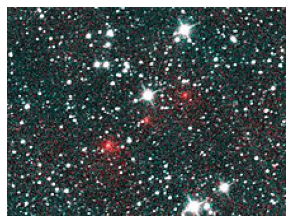

The existence of Comet NEOWISE (here depicted as a series of red dots) was discovered by analyzing astronomical survey data acquired by a space telescope, the Wide-field Infrared Survey Explorer.


In [40]:
#the image from wikipedia with the thumbcaption

fig, ax = plt.subplots(figsize=(5, 7))
fig = img.imread('star.jpg')
plt.imshow(fig)
plt.axis('off')
plt.show()

print(thumb_text.text)

<h4>Selenium</h4>

In [41]:
#install chromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

/var/folders/sq/fggxzcn90p73_7hm62_tglm40000gn/T/ipykernel_15722/4030892497.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [42]:
#get the url through the driver
driver.get(url_wiki)

In [43]:
#to emulate a human behaviour  
time.sleep(5)

In [44]:
#Xpath of the elements table
text_Xpath = '//*[@id= "mw-content-text"]'   

In [45]:
#scrap the header 
raw_selenium = []
for content in driver.find_elements(by=By.XPATH, value=text_Xpath):
    raw_selenium.append(content.text)

In [46]:
str_selenium = str(raw_selenium)
str_selenium 

'[\'Not to be confused with information science.\\nThe existence of Comet NEOWISE (here depicted as a series of red dots) was discovered by analyzing astronomical survey data acquired by a space telescope, the Wide-field Infrared Survey Explorer.\\nData science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.[3]\\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data.[4] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[3] However, data science is different from computer science and informati

In [47]:
text_selenium = re.sub(r'\[[0-9]*\]',' ',str_selenium) #regex to replace footnotes
text_selenium = re.sub(r'\s+',' ',str_selenium) #more than a whitespce
text_selenium = text.lower() #lowercase the strings

In [48]:
text_selenium

' data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains. data science is related to data mining, machine learning and big data. data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data. it uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. however, data science is different from computer science and information science. turing award winner jim gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" a

In [49]:
#text segmented by sentence
selenium_sentences = nltk.sent_tokenize(text_selenium)
selenium_sentences 

[' data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains.',
 'data science is related to data mining, machine learning and big data.',
 'data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data.',
 'it uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.',
 'however, data science is different from computer science and information science.',
 'turing award winner jim gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of info

In [50]:
caption_Xpath = '//*[@class="thumbinner"]'   

captionImage_selenium = []
for content in driver.find_elements(by=By.XPATH, value=caption_Xpath):
    captionImage_selenium.append(content.text)

In [51]:
print(captionImage_selenium)

['The existence of Comet NEOWISE (here depicted as a series of red dots) was discovered by analyzing astronomical survey data acquired by a space telescope, the Wide-field Infrared Survey Explorer.']


In [52]:
image_Xpath = '//*[@class="image"]' 

xpath_images = driver.find_elements(by=By.XPATH, value=image_Xpath)

image_selenium = []
for content in xpath_images:
    for img in images:
        print(img['src'])
        image_selenium.append(img["src"])
       

//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg
//en.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1
/static/images/footer/wikimedia-button.png
/static/images/footer/poweredby_mediawiki_88x31.png


In [53]:
#complete the url
full_selenium_url = "https:"+ image_selenium[0]
full_selenium_url 


'https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg'

In [54]:
#shutil is a python library that can do operations to files

r_sel = requests.get(full_selenium_url, stream=True)

if r_sel.status_code == 200:                     #200 status code = OK
    with open("star_sel.png", 'wb') as f: 
        r_sel.raw.decode_content = True
        shutil.copyfileobj(r_sel.raw, f)

<h2>Exercise 2</h2> 

In [55]:
table_df['Últ.'] =table_df['Últ.'].str.replace(',','.').astype(float)
table_df['% Dif.'] =table_df['% Dif.'].str.replace(',','.').astype(float)
table_df['Máx.'] =table_df['Máx.'].str.replace(',','.').astype(float)
table_df['Mín.'] =table_df['Mín.'].str.replace(',','.').astype(float)
table_df['Efectivo (miles €)'] =table_df['Efectivo (miles €)'].str.replace('.','').str.replace(',','.').astype(float)

/var/folders/sq/fggxzcn90p73_7hm62_tglm40000gn/T/ipykernel_15722/1029496813.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  table_df['Efectivo (miles €)'] =table_df['Efectivo (miles €)'].str.replace('.','').str.replace(',','.').astype(float)


In [56]:
#get date 
today = date.today()
    
# create a document
document = Document()

#add heading
document.add_heading('Daily Session Prices'+" "+str(today), level = 0)
document.add_heading('About Dataset', level = 1)

# Context
context = document.add_heading(' CONTEXT: ', level = 2)
context = document.add_paragraph('This document present the daily session prices of the IBEX 35 stocks.The IBEX 35 is the benchmark stock market index of the Bolsa de Madrid, Spain principal stock exchange', 
                       style = 'List Bullet').runs[0].font.size = Pt(12)


# Content
content = document.add_heading(' CONTENT: ', level = 2)
content = document.add_paragraph('Nombre: Stock name', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Últ: Latest share price update', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('% Dif: Share price difference', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Máx: The maximum share price of the session', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Mín: The minimum share price of the session', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Volumen: Share volume', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Efectivo (miles €):  Company cash', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Fecha: Daily date', style = 'List Bullet').runs[0].font.size = Pt(11)
content = document.add_paragraph('Hora: Hour ', style = 'List Bullet').runs[0].font.size = Pt(11)
 

#aclnowledgements
ack = document.add_heading('Acknowledgements: ', level = 2)
ack = document.add_paragraph('Thank You, Public Data').runs[0].font.size = Pt(11)

#table heading
document.add_heading('Daily Session Table', level = 1)

#table 
table = document.add_table(rows = 1, cols = len(table_df.columns), style = 'Table Grid')
hdr_cells = table.rows[0].cells

#rows
for i in range(len(table_df.columns)):
    hdr_cells[i].text = table_df.columns[i]
for i in range(len(table_df)):
    rows_cells = table.add_row().cells
    for j in range(len(table_df.columns)):
        rows_cells[j].text = str(table_df.iat[i,j])

#font rows        
for row in table.rows:
    for cell in row.cells:
        paragraphs = cell.paragraphs
        paragraph = paragraphs[0]
        run_obj = paragraph.runs
        run = run_obj[0]
        font = run.font
        font.size = Pt(9)
        

        
# Wiki
wiki = document.add_heading(' WIKI DATA SCIENCE: ', level = 2)
wiki = document.add_paragraph(sentences).runs[0].font.size = Pt(11)

               
#table alignment        
table.alignment = WD_TABLE_ALIGNMENT.CENTER  

paragraph = document.add_paragraph()
paragraph.paragraph_format.line_spacing_rule = WD_LINE_SPACING.EXACTLY


document.add_heading("Wiki image ", level=2)
document.add_picture('starv2.png', width=Inches(5))
image_caption = document.add_paragraph()
image_caption.add_run('Image Caption').bold = True
image_caption = document.add_paragraph(captionImage_selenium).runs[0].font.size = Pt(11)

#break page
document.add_page_break()


document.save('IBEX35_Kaggle_Style.docx')

<h2>Exercise 3</h2> 

**Choose a web page of your choice and perform web scraping using the Selenium library first and Scrapy later.**


<h3>Scrappy</h3>

In [57]:
class elPaisSpider(scrapy.Spider):
    name = "articles"
    
    start_urls = ['https://english.elpais.com/science-tech/' ]

    def parse(self, response):
        author_page_links = response.xpath("//header/h2/a/@href")
        yield from response.follow_all(author_page_links, self.parse_author)

        pagination_links = "https://english.elpais.com/" + response.xpath("/html/body/div/main/div/div/a/@href").get()
        yield from response.follow_all(pagination_links, self.parse)

    def parse_author(self, response):
        def extract_with_css(query):
            return response.xpath(query).get(default='').strip()
        def extract_all(query):
            return response.xpath(query).getall()

        yield {
            'url': response.url,
            'date': extract_with_css('//*[@id="article_date_p"]/text()'),
            'title': extract_with_css('//header/div/h1/text()'),
            'author': extract_with_css('/html/body/div/article/div/div/div/a/text()'),
            'text_art': extract_all('/html/body/div/article/div/p/text()'),
        }
FILE_NAME = 'elpais_scrap.csv'
SETTINGS = {
            'FEED_FORMAT': 'csv',
            'FEED_URI': FILE_NAME,
            'DOWNLOAD_DELAY': 5,
            } 

In [58]:
process = CrawlerProcess(SETTINGS)
process.crawl(elPaisSpider) 
process.start()

2022-07-25 15:18:38 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-07-25 15:18:38 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.2.0, Python 3.9.7 (default, Sep 16 2021, 08:50:36) - [Clang 10.0.0 ], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.8, Platform macOS-10.15.7-x86_64-i386-64bit
2022-07-25 15:18:38 [scrapy.crawler] INFO: Overridden settings:
{'DOWNLOAD_DELAY': 5}
2022-07-25 15:18:38 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-07-25 15:18:38 [scrapy.extensions.telnet] INFO: Telnet Password: bca80b056cbcb39a
2022-07-25 15:18:38 [py.warnings] WARNING: /Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/scrapy/extensions/feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more deta

2022-07-25 15:18:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-15/changing-small-pieces-of-the-cerebral-cortex-can-generate-superhero-abilities-oscar-marin-neuroscientist.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:18:54 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-15/changing-small-pieces-of-the-cerebral-cortex-can-generate-superhero-abilities-oscar-marin-neuroscientist.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-15/changing-small-pieces-of-the-cerebral-cortex-can-generate-superhero-abilities-oscar-marin-neuroscientist.html', 'date': '15 Jul 2022', 'title': '‘Changing small pieces of the cerebral cortex can generate superhero abilities’: Óscar Marín, neuroscientist', 'author': 'Manuel Ansede', 'text_art': [', the Spaniard ', ', invented beautiful metaphors to explain what he discovered with his microscope at the end of the 19th century. C

2022-07-25 15:19:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-15/study-indicates-that-people-over-40-may-benefit-from-small-amounts-of-alcohol-consumption.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:06 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-15/study-indicates-that-people-over-40-may-benefit-from-small-amounts-of-alcohol-consumption.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-15/study-indicates-that-people-over-40-may-benefit-from-small-amounts-of-alcohol-consumption.html', 'date': '15 Jul 2022', 'title': 'Study indicates that people over 40 may benefit from small amounts of alcohol consumption', 'author': 'Daniel Mediavilla', 'text_art': ['Generally speaking, consuming alcohol is bad for your health, and the more you consume, the worse it is. However, there may be exceptions to this general rule. That is one of the conclusions of

2022-07-25 15:19:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-16/if-we-wrap-our-children-in-digital-cotton-they-will-not-learn-to-cope-with-problems.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-16/if-we-wrap-our-children-in-digital-cotton-they-will-not-learn-to-cope-with-problems.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-16/if-we-wrap-our-children-in-digital-cotton-they-will-not-learn-to-cope-with-problems.html', 'date': '16 Jul 2022', 'title': '‘If we wrap our children in digital cotton, they will not learn to cope with problems’', 'author': 'Jordi Pérez Colomé', 'text_art': ['Sonia Livingstone, a professor at the London School of Economics, is one of the world’s leading experts on minors and ', '. In the last two decades, she has written 20 books and hundreds of scientific articles. “R

2022-07-25 15:19:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-16/why-do-mosquitoes-bite-some-people-more-than-others.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:20 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-16/why-do-mosquitoes-bite-some-people-more-than-others.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-16/why-do-mosquitoes-bite-some-people-more-than-others.html', 'date': '16 Jul 2022', 'title': 'Why do mosquitoes bite some people more than others?', 'author': '', 'text_art': ['Disease-carrying mosquitoes have killed more people than all the wars in recorded history combined. In fact, statistics indicate that the mosquito is by far the world’s deadliest creature for humans.', 'Mosquitos caused around 725,000 deaths in 2018 alone. The second leading cause of death for humans that year was other people, responsible for 437,000 deaths.

2022-07-25 15:19:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-16/does-my-body-need-sex.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:29 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-16/does-my-body-need-sex.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-16/does-my-body-need-sex.html', 'date': '16 Jul 2022', 'title': 'Does my body need sex?', 'author': '', 'text_art': ['Under normal circumstances, no. It is true that ', ' bring with them a sense of physical and mental well-being, but not having them does not cause any discomfort, so they are not actually essential. Some people are asexual; they don’t have sexual relations and abstaining has no side effects. For people who are not asexual, sex is not necessary either; that is to say, sexual relations are not a basic need on a par with breathing, eating or drinking.', 'Generally speaking, when 

2022-07-25 15:19:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-19/what-is-harlequin-type-ichthyosis-the-strange-fish-skin-disease.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-19/what-is-harlequin-type-ichthyosis-the-strange-fish-skin-disease.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-19/what-is-harlequin-type-ichthyosis-the-strange-fish-skin-disease.html', 'date': '19 Jul 2022', 'title': 'What is harlequin-type ichthyosis, the strange ‘fish skin’ disease?', 'author': 'Jessica Mouzo', 'text_art': ['Ariadna López’s skin has been eroded since the day she was born. Dry and cracked, sometimes red, from head to toe. This 21-year-old woman suffers from harlequin-type ichthyosis, a highly unusual dermatological condition that is caused by ', ' that alters the process through which the epidermis is

2022-07-25 15:19:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-19/predictive-policing-the-pitfalls-of-crime-forecasting.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-19/predictive-policing-the-pitfalls-of-crime-forecasting.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-19/predictive-policing-the-pitfalls-of-crime-forecasting.html', 'date': '19 Jul 2022', 'title': 'Predictive policing: The pitfalls of crime forecasting', 'author': 'Manuel G. Pascual', 'text_art': ['Knowing where a crime is going to be committed before it happens is the dream of police departments all over the world, and data scientists and ', ' want to make it a reality. Many law enforcement agencies, especially in the US where ', ', have been using pattern-detecting information systems to predict crime hotspots. A research team

2022-07-25 15:19:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-20/could-recreational-drug-ketamine-provide-the-antidote-to-depression.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:19:56 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-20/could-recreational-drug-ketamine-provide-the-antidote-to-depression.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-20/could-recreational-drug-ketamine-provide-the-antidote-to-depression.html', 'date': '20 Jul 2022', 'title': 'Could recreational drug ketamine provide the antidote to depression?', 'author': 'Isabel Rubio', 'text_art': ['Ketamine was first employed in the 1960s as an anesthetic in operating rooms and on battlefields, as well as being a recreational drug favored by the counter-culture. However, as professor Hailan Hu, executive director of the Center for Neuroscience at Zhejiang University’s Faculty of

2022-07-25 15:20:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/1/> from <GET https://english.elpais.com/science-tech/1>
2022-07-25 15:20:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/-/> from <GET https://english.elpais.com/science-tech/->
2022-07-25 15:20:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/m/> from <GET https://english.elpais.com/science-tech/m>
2022-07-25 15:20:41 [scrapy.extensions.logstats] INFO: Crawled 15 pages (at 4 pages/min), scraped 14 items (at 4 items/min)
2022-07-25 15:20:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/o/> from <GET https://english.elpais.com/science-tech/o>
2022-07-25 15:20:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.

2022-07-25 15:22:48 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/i/>: HTTP status code is not handled or not allowed
2022-07-25 15:22:55 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/l/> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:22:55 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/l/>: HTTP status code is not handled or not allowed
2022-07-25 15:23:03 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/g/> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:23:03 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/g/>: HTTP status code is not handled or not allowed
2022-07-25 15:23:09 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/n/> (referer: https://english.elp

2022-07-25 15:23:41 [scrapy.extensions.logstats] INFO: Crawled 32 pages (at 7 pages/min), scraped 16 items (at 2 items/min)
2022-07-25 15:23:42 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/:/> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:23:43 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/:/>: HTTP status code is not handled or not allowed
2022-07-25 15:23:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/culture/2022-07-05/ezra-miller-from-blockbuster-star-to-alleged-kidnapper.html> (referer: https://english.elpais.com/)
2022-07-25 15:23:51 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/culture/2022-07-05/ezra-miller-from-blockbuster-star-to-alleged-kidnapper.html>
{'url': 'https://english.elpais.com/culture/2022-07-05/ezra-miller-from-blockbuster-star-to-alleged-kidnapper.html', 'date': '05 Jul 2022', 'title':

2022-07-25 15:23:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/1/-/> from <GET https://english.elpais.com/science-tech/1/->
2022-07-25 15:23:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/1/m/> from <GET https://english.elpais.com/science-tech/1/m>
2022-07-25 15:24:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/1/o/> from <GET https://english.elpais.com/science-tech/1/o>
2022-07-25 15:24:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/1/c/> from <GET https://english.elpais.com/science-tech/1/c>
2022-07-25 15:24:20 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://english.elpais.com/science-tech/1/a/> from <GET https://english.elpais.com/science-tech/1/a>
2022-07-25 15:24:27 [scrapy.co

2022-07-25 15:26:52 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/1/:/> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:26:52 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/1/:/>: HTTP status code is not handled or not allowed
2022-07-25 15:26:59 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/1/s/> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:26:59 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/1/s/>: HTTP status code is not handled or not allowed
2022-07-25 15:27:06 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/1/p/> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:27:06 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/1/p/>: HTTP s

2022-07-25 15:27:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-22/how-to-see-rare-five-planet-alignment-in-the-night-sky.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:27:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-22/how-to-see-rare-five-planet-alignment-in-the-night-sky.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-22/how-to-see-rare-five-planet-alignment-in-the-night-sky.html', 'date': '22 Jun 2022', 'title': 'How to see rare five-planet alignment in the night sky', 'author': 'Laura Camacho', 'text_art': ['A rare planet parade is offering skywatchers the chance to see the five major planets in alignment: Mercury, Venus, Mars, Jupiter and Saturn. The best time for viewing will be just before sunrise on Friday, June 24, when the ', ', appearing between Venus and Mars. This is the first time this alignment has happened since December 2004

2022-07-25 15:27:55 [scrapy.downloadermiddlewares.retry] DEBUG: Retrying <GET https://english.elpais.com/science-tech/1/i/> (failed 2 times): 504 Gateway Time-out
2022-07-25 15:28:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-23/yves-coppens-one-of-the-discoverers-of-famous-fossil-lucy-dies-at-87.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:28:04 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-23/yves-coppens-one-of-the-discoverers-of-famous-fossil-lucy-dies-at-87.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-23/yves-coppens-one-of-the-discoverers-of-famous-fossil-lucy-dies-at-87.html', 'date': '23 Jun 2022', 'title': 'Yves Coppens, one of the discoverers of famous fossil ‘Lucy,’ dies at 87', 'author': 'Daniel Mediavilla', 'text_art': ['In 1974, Yves Coppens and other colleagues discovered what is probably the most famous fossil in the world. 

2022-07-25 15:28:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-24/is-antivirus-software-still-essential.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:28:15 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-24/is-antivirus-software-still-essential.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-24/is-antivirus-software-still-essential.html', 'date': '24 Jun 2022', 'title': 'Is antivirus software still essential?', 'author': 'Clara Rebollo', 'text_art': ['Half a century ago, the first computer antivirus software in history appeared: the program Reaper was made to attack Creeper, the first virus. Since then, as technology has become ubiquitous in our daily lives, digital threats have evolved. Developers of antivirus software have tried to adapt to new challenges. But the complexity of today’s attacks mean that users cannot simply delegate their safety

2022-07-25 15:28:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-24/covid-vaccines-saved-nearly-20-million-lives-study-finds.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:28:29 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-24/covid-vaccines-saved-nearly-20-million-lives-study-finds.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-24/covid-vaccines-saved-nearly-20-million-lives-study-finds.html', 'date': '24 Jun 2022', 'title': 'Covid vaccines saved nearly 20 million lives, study finds', 'author': 'Miguel Ángel Criado', 'text_art': ['Margaret Keenan, a 90-year-old British woman, received the first Covid-19 vaccine outside of clinical trials on December 8, 2020. A study published on Thursday in the ', ' has modeled what would have happened without Covid-19 vaccines – in other words, how many lives did they save. According to the research, the vaccin

2022-07-25 15:28:41 [scrapy.extensions.logstats] INFO: Crawled 62 pages (at 8 pages/min), scraped 29 items (at 7 items/min)
2022-07-25 15:28:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-25/is-it-possible-to-stop-snoring.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:28:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-25/is-it-possible-to-stop-snoring.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-25/is-it-possible-to-stop-snoring.html', 'date': '25 Jun 2022', 'title': 'Is it possible to stop snoring?', 'author': '', 'text_art': ['To find out whether you can stop snoring, you must first understand why you snore. It is also important to consider whether or not snoring is a disease. Snoring is the noise that occurs when breathing while asleep. The airway includes all parts of the respiratory system except for the lungs. When we fall asleep, our a

2022-07-25 15:28:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-26/aspirin-for-cancer-and-thalidomide-for-leprosy-new-life-for-old-drugs.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:28:56 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-26/aspirin-for-cancer-and-thalidomide-for-leprosy-new-life-for-old-drugs.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-26/aspirin-for-cancer-and-thalidomide-for-leprosy-new-life-for-old-drugs.html', 'date': '26 Jun 2022', 'title': 'Aspirin for cancer and thalidomide for leprosy: new life for old drugs', 'author': 'Jessica Mouzo', 'text_art': ['Call it scientific serendipity–scientists testing a drug to treat angina pectoris unexpectedly stumbled upon a remedy for erectile dysfunction. In the 1980s, pharma giant Pfizer began testing a compound called sildenafil to relax the coronary arteries and improve blood flow

2022-07-25 15:29:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-26/lamda-the-machine-that-is-like-a-7-year-old-kid-can-a-computer-have-consciousness.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:29:02 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-26/lamda-the-machine-that-is-like-a-7-year-old-kid-can-a-computer-have-consciousness.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-26/lamda-the-machine-that-is-like-a-7-year-old-kid-can-a-computer-have-consciousness.html', 'date': '26 Jun 2022', 'title': 'LaMDA, the machine that is like ‘a seven-year-old kid’: can a computer have consciousness?', 'author': 'Manuel G. Pascual', 'text_art': ['If we were to hand Isaac Newton a smartphone, he would be completely captivated. He wouldn’t have the faintest idea how it worked and one of the greatest scientific minds in history would quite possibly start talki

2022-07-25 15:29:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-26/a-stone-found-in-egypt-in-1996-could-be-first-evidence-of-rare-supernova-explosion.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:29:07 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-26/a-stone-found-in-egypt-in-1996-could-be-first-evidence-of-rare-supernova-explosion.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-26/a-stone-found-in-egypt-in-1996-could-be-first-evidence-of-rare-supernova-explosion.html', 'date': '26 Jun 2022', 'title': 'A stone found in Egypt in 1996 could be first evidence of rare supernova explosion', 'author': 'Marc Español', 'text_art': ['One December morning in 1996, shortly after the dawn prayer, Egyptian geologist Aly Barakat stumbled across a strange carbonaceous rock – black, embedded with diamonds, weighing about 30 grams – in the desert of southwestern

2022-07-25 15:29:14 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/economy-and-business/2022-06-26/mauricio-de-mucha-hair-dryers-use-more-energy-than-bitcoin-mining.html>
{'url': 'https://english.elpais.com/economy-and-business/2022-06-26/mauricio-de-mucha-hair-dryers-use-more-energy-than-bitcoin-mining.html', 'date': '26 Jun 2022', 'title': 'Mauricio de Mucha: ‘Hair dryers use more energy than bitcoin mining’', 'author': 'María Julia Castañeda', 'text_art': ['For Mexican solar-energy finance company Red Girasol, bitcoin mining – the practice of using massive amounts of energy to generate ', ' – seemed like the only way they could escape the pandemic. The “fintech” (financial technology) company was just getting off the ground when their clients started returning all the equipment they had leased because they could no longer afford to make payments. That was when Mauricio de Mucha – the company’s 30-year-old CEO from the northeastern Mexican city of Monterrey

2022-07-25 15:29:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/economy-and-business/2022-06-29/hikaru-nakamura-meet-the-worlds-wealthiest-chess-player.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:29:25 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/economy-and-business/2022-06-29/hikaru-nakamura-meet-the-worlds-wealthiest-chess-player.html>
{'url': 'https://english.elpais.com/economy-and-business/2022-06-29/hikaru-nakamura-meet-the-worlds-wealthiest-chess-player.html', 'date': '29 Jun 2022', 'title': 'Hikaru Nakamura: Meet the world’s wealthiest chess player', 'author': 'Leontxo García', 'text_art': ['Multiple sources estimate 34-year-old chess player Hikaru Nakamura’s fortune at around $50 million (or €47.3 million). However, only a small percentage of those earnings come from prizes he has won ', ' such as Madrid’s Candidates Tournament, where he is currently competing (he is in third place). At th

2022-07-25 15:29:37 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://english.elpais.com/science-tech/1/i/> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:29:38 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://english.elpais.com/science-tech/1/i/>: HTTP status code is not handled or not allowed
2022-07-25 15:29:41 [scrapy.extensions.logstats] INFO: Crawled 72 pages (at 10 pages/min), scraped 38 items (at 9 items/min)
2022-07-25 15:29:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-06-29/three-ways-youre-using-your-cell-phone-wrong.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:29:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-06-29/three-ways-youre-using-your-cell-phone-wrong.html>
{'url': 'https://english.elpais.com/science-tech/2022-06-29/three-ways-youre-using-your-cell-phone-wrong.html', 'date': '29 Jun 2022', '

2022-07-25 15:30:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-01/who-concerned-about-first-cases-of-monkeypox-in-children.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:30:00 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-01/who-concerned-about-first-cases-of-monkeypox-in-children.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-01/who-concerned-about-first-cases-of-monkeypox-in-children.html', 'date': '01 Jul 2022', 'title': 'WHO concerned about first cases of monkeypox in children', 'author': 'Oriol Güell', 'text_art': ['Reports of young children ', ' in Europe - there were at least four in recent days, with a fifth one recorded a few weeks ago - have raised concern about the progress of an outbreak now affecting more than 5,500 people in 51 countries.', 'The health organization’s Europe chief, Hans Kluge, also warned on Friday that overall cas

2022-07-25 15:30:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-05/what-is-and-what-is-not-a-bipolar-disorder-the-most-trivialized-serious-mental-problem.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:30:12 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-05/what-is-and-what-is-not-a-bipolar-disorder-the-most-trivialized-serious-mental-problem.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-05/what-is-and-what-is-not-a-bipolar-disorder-the-most-trivialized-serious-mental-problem.html', 'date': '05 Jul 2022', 'title': 'What is and what is not a bipolar disorder, the most trivialized serious mental problem', 'author': 'Guillermo Lahera', 'text_art': ['Bipolar disorder is probably the most trivialized serious ', '. In contrast to the terms schizophrenia or anorexia nervosa, which bring to mind something sordid and dark, the so-called ', ' hints at a pl

2022-07-25 15:30:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-05/dall-e-the-popular-automatic-image-generator-that-makes-sexist-and-racist-drawings.html> (referer: https://english.elpais.com/science-tech/1/)
2022-07-25 15:30:17 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-05/dall-e-the-popular-automatic-image-generator-that-makes-sexist-and-racist-drawings.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-05/dall-e-the-popular-automatic-image-generator-that-makes-sexist-and-racist-drawings.html', 'date': '05 Jul 2022', 'title': 'Dall-E Mini, the popular automatic image generator that makes sexist and racist drawings', 'author': 'Manuel G. Pascual', 'text_art': ['Social media has been flooded in recent weeks with surreal images generated by an automated program called ', ' recently ', ' – the pocket-sized version of a sophisticated artificial intelligence (AI) system capab

2022-07-25 15:30:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/culture/2022-07-13/succession-and-ted-lasso-lead-2022-emmy-nominations.html> (referer: https://english.elpais.com/)
2022-07-25 15:30:22 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/culture/2022-07-13/succession-and-ted-lasso-lead-2022-emmy-nominations.html>
{'url': 'https://english.elpais.com/culture/2022-07-13/succession-and-ted-lasso-lead-2022-emmy-nominations.html', 'date': '13 Jul 2022', 'title': '‘Succession’ and ‘Ted Lasso’ lead 2022 Emmy nominations', 'author': 'Natalia Marcos', 'text_art': ['The Television Academy announced on Tuesday the nominees for the 74th Emmy Awards, which will be held on Monday, September 12. There were no big surprises. As was expected, the hit TV show', 'which won Best Drama Series at the 2020 Emmy Awards, leads the way with 25 nominations. ', ', which has previously won seven Emmys, was nominated for 20 awards, and ', 'has dominat

2022-07-25 15:30:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/usa/2022-07-22/california-governors-star-rises-as-bidens-popularity-sinks.html> (referer: https://english.elpais.com/)
2022-07-25 15:30:35 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/usa/2022-07-22/california-governors-star-rises-as-bidens-popularity-sinks.html>
{'url': 'https://english.elpais.com/usa/2022-07-22/california-governors-star-rises-as-bidens-popularity-sinks.html', 'date': '22 Jul 2022', 'title': 'California governor’s star rises as Biden’s popularity sinks', 'author': 'Luis Pablo Beauregard', 'text_art': ['“It’s not even on my radar. I have less than zero interest.” That’s what California Governor Gavin Newsom told the editorial board of the ', ' in late May when asked about his interest in the 2024 presidential race. Several weeks later, Newsom seems to be testing the waters, despite frequent denials. As the leader of the nation’s most populous state

2022-07-25 15:30:41 [scrapy.extensions.logstats] INFO: Crawled 82 pages (at 10 pages/min), scraped 48 items (at 10 items/min)
2022-07-25 15:30:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/culture/2022-07-12/cut-the-crap-the-clashs-fiasco-of-a-swansong.html> (referer: https://english.elpais.com/)
2022-07-25 15:30:47 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/culture/2022-07-12/cut-the-crap-the-clashs-fiasco-of-a-swansong.html>
{'url': 'https://english.elpais.com/culture/2022-07-12/cut-the-crap-the-clashs-fiasco-of-a-swansong.html', 'date': '12 Jul 2022', 'title': '‘Cut the Crap’: The Clash’s fiasco of a swansong', 'author': 'Diego A. Manrique', 'text_art': ['In the discographies of all long-standing artists, there is usually one ugly duckling, a release that makes no sense and is either the result of the record company’s greed, or a testament to a time when ', '.', '(1985), which turned out to be The Clash’s final album, bel

2022-07-25 15:30:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/opinion/the-global-observer/2022-06-30/latin-america-quo-vadis.html> (referer: https://english.elpais.com/)
2022-07-25 15:31:00 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/opinion/the-global-observer/2022-06-30/latin-america-quo-vadis.html>
{'url': 'https://english.elpais.com/opinion/the-global-observer/2022-06-30/latin-america-quo-vadis.html', 'date': '30 Jun 2022', 'title': 'Latin America, quo vadis?', 'author': 'Moisés Naím', 'text_art': ['Colombia has just elected its next president,', '. Despite his long political career, the president-elect presents himself as an outsider who is out to dislodge the long-ruling elites from power. That’s the same promise made by Andrés Manuel López Obrador of Mexico, Gabriel Boric of Chile, Pedro Castillo of Peru, Alberto Fernández of Argentina and several other Latin American presidents. On October 2, Brazil will hold electio

2022-07-25 15:31:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/international/2022-07-17/caro-quintero-the-old-drug-lord-who-revolutionized-the-world-of-marijuana.html> (referer: https://english.elpais.com/)
2022-07-25 15:31:13 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/international/2022-07-17/caro-quintero-the-old-drug-lord-who-revolutionized-the-world-of-marijuana.html>
{'url': 'https://english.elpais.com/international/2022-07-17/caro-quintero-the-old-drug-lord-who-revolutionized-the-world-of-marijuana.html', 'date': '17 Jul 2022', 'title': 'Caro Quintero, the old drug lord who revolutionized the world of marijuana', 'author': 'Jacobo García', 'text_art': ['“Why are you smiling so much? Has life treated you well?”', '“Yes, it has treated me well because I am alive.”', 'This was', 's response to a journalist in 1985 on the day he was sent to prison for the first time. He had just been caught with his girlfriend in Costa Ric

2022-07-25 15:31:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/international/2022-07-12/a-better-way-to-understand-the-us-mexico-relationship.html> (referer: https://english.elpais.com/)
2022-07-25 15:31:26 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/international/2022-07-12/a-better-way-to-understand-the-us-mexico-relationship.html>
{'url': 'https://english.elpais.com/international/2022-07-12/a-better-way-to-understand-the-us-mexico-relationship.html', 'date': '12 Jul 2022', 'title': 'A better way to understand the US-Mexico relationship', 'author': 'Viri Ríos', 'text_art': ['American political rhetoric depicting Mexico as an adversary is most commonly associated with ', '. In reality, it has been a bipartisan political sport long preceding Trump that still guides how leaders in both parties often frame the US-Mexico relationship. While Trump’s outright villainization of Mexico is no longer a daily news topic, a recent artic

2022-07-25 15:31:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/society/2022-07-22/carlos-rios-the-rise-and-fall-of-the-nutritionist-who-invented-realfooding.html> (referer: https://english.elpais.com/)
2022-07-25 15:31:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/society/2022-07-22/carlos-rios-the-rise-and-fall-of-the-nutritionist-who-invented-realfooding.html>
{'url': 'https://english.elpais.com/society/2022-07-22/carlos-rios-the-rise-and-fall-of-the-nutritionist-who-invented-realfooding.html', 'date': '22 Jul 2022', 'title': 'Carlos Ríos: The rise and fall of the nutritionist who invented ‘realfooding’', 'author': 'Daniel Mediavilla', 'text_art': ['Like many gurus before him, Carlos Ríos, a 31-year-old from Huelva in southern Spain, won his iconic status in the world of nutrition with predictions of doom. The signs of an apocalypse were everywhere: on supermarket shelves, billboards and vending machines. He flagged up the

2022-07-25 15:31:41 [scrapy.extensions.logstats] INFO: Crawled 91 pages (at 9 pages/min), scraped 57 items (at 9 items/min)
2022-07-25 15:31:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/culture/2022-07-20/eva-green-the-iconic-femme-fatale-who-fled-hollywood-ive-already-been-told-that-im-too-old-for-some-roles.html> (referer: https://english.elpais.com/)
2022-07-25 15:31:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/culture/2022-07-20/eva-green-the-iconic-femme-fatale-who-fled-hollywood-ive-already-been-told-that-im-too-old-for-some-roles.html>
{'url': 'https://english.elpais.com/culture/2022-07-20/eva-green-the-iconic-femme-fatale-who-fled-hollywood-ive-already-been-told-that-im-too-old-for-some-roles.html', 'date': '20 Jul 2022', 'title': 'Eva Green, the iconic femme fatale who fled Hollywood: “I’ve already been told that I’m too old for some roles”', 'author': 'Carlos Megía', 'text_art': ['It doesn’t matter that almost 10

2022-07-25 15:31:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/economy-and-business/2021-11-15/el-pais-offers-free-spanish-lessons-with-gymglish.html> (referer: https://english.elpais.com/)
2022-07-25 15:31:58 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/economy-and-business/2021-11-15/el-pais-offers-free-spanish-lessons-with-gymglish.html>
{'url': 'https://english.elpais.com/economy-and-business/2021-11-15/el-pais-offers-free-spanish-lessons-with-gymglish.html', 'date': '15 Nov 2021', 'title': 'EL PAÍS offers free Spanish lessons with Gymglish', 'author': 'El País', 'text_art': ['EL PAÍS has partnered with language-learning company Gymglish to offer online personalized lessons in Spanish. Readers who sign up before the end of the year will ', ' ', ', with no further commitment required.', 'The lessons only take 15 minutes and are available online. Before starting the course, students will be given a free language assessment t

2022-07-25 15:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/society/2022-07-23/how-to-avoid-the-routine-things-that-can-hurt-a-relationship.html> (referer: https://english.elpais.com/)
2022-07-25 15:32:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/society/2022-07-23/how-to-avoid-the-routine-things-that-can-hurt-a-relationship.html>
{'url': 'https://english.elpais.com/society/2022-07-23/how-to-avoid-the-routine-things-that-can-hurt-a-relationship.html', 'date': '23 Jul 2022', 'title': 'How to avoid the routine things that can hurt a relationship', 'author': 'Arola Poch', 'text_art': ['“You don’t do anything around the house.”', 'This is a familiar reproach among couples. Whenever Dr. John Gottman hears someone utter it, he throws up his hands.', 'Gottman, an American psychologist, has studied romantic relationships for over 40 years. He has published nearly 200 papers and dozens of books on what can ruin them. The main cul

2022-07-25 15:32:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/culture/2022-07-21/picasso-sketch-seized-at-ibiza-airport-is-authentic-say-spanish-experts.html> (referer: https://english.elpais.com/)
2022-07-25 15:32:22 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/culture/2022-07-21/picasso-sketch-seized-at-ibiza-airport-is-authentic-say-spanish-experts.html>
{'url': 'https://english.elpais.com/culture/2022-07-21/picasso-sketch-seized-at-ibiza-airport-is-authentic-say-spanish-experts.html', 'date': '21 Jul 2022', 'title': 'Picasso sketch seized at Ibiza airport is authentic, say Spanish experts', 'author': 'Lucía Bohórquez', 'text_art': ['Spanish cultural authorities have issued a preliminary report confirming the authenticity of a sketch attributed ', ' that was confiscated at Ibiza airport on July 5 from a passenger on a flight from Zurich, Switzerland. The expert opinion, issued at the request of the Spanish Culture Ministry

2022-07-25 15:32:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/culture/2022-07-23/an-auschwitz-love-story.html> (referer: https://english.elpais.com/)
2022-07-25 15:32:39 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/culture/2022-07-23/an-auschwitz-love-story.html>
{'url': 'https://english.elpais.com/culture/2022-07-23/an-auschwitz-love-story.html', 'date': '23 Jul 2022', 'title': 'An Auschwitz love story', 'author': 'David Granda', 'text_art': ['Rudolf Friemel was allowed to grow his hair out for the wedding. He borrowed a suit, tie, and shoes from the feared Nazi SS (Schutzstaffel) squadron. His father and brother arrived by train from Vienna along with the bride, Margarita Ferrer, who was allowed to enter ', 'with their three-year-old son, Édouard. A Polish prisoner took photos at the ceremony, which was followed by a small banquet. The newlyweds spent their wedding night in the camp’s brothel, a cell in Barracks 24. The nex

2022-07-25 15:32:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/economy-and-business/2022-07-21/mexicos-cfe-suspects-former-official-opened-us-company-as-conduit-for-improper-payments.html> (referer: https://english.elpais.com/)
2022-07-25 15:32:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/economy-and-business/2022-07-21/mexicos-cfe-suspects-former-official-opened-us-company-as-conduit-for-improper-payments.html>
{'url': 'https://english.elpais.com/economy-and-business/2022-07-21/mexicos-cfe-suspects-former-official-opened-us-company-as-conduit-for-improper-payments.html', 'date': '21 Jul 2022', 'title': 'Mexico’s CFE suspects former official opened US company as ‘conduit for improper payments’', 'author': 'Isabella Cota', 'text_art': ['The Whitewater Midstream case is advancing in the US, where the Mexican state electricity utility, the Federal Electricity Commission (CFE), has made new requests for evidence from two compan

2022-07-25 15:32:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/usa/2022-07-24/inside-kylie-jenners-private-jet-flights-12-minute-trips-and-almost-a-ton-of-co.html> (referer: https://english.elpais.com/)
2022-07-25 15:32:54 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/usa/2022-07-24/inside-kylie-jenners-private-jet-flights-12-minute-trips-and-almost-a-ton-of-co.html>
{'url': 'https://english.elpais.com/usa/2022-07-24/inside-kylie-jenners-private-jet-flights-12-minute-trips-and-almost-a-ton-of-co.html', 'date': '24 Jul 2022', 'title': 'Inside Kylie Jenner’s private jet flights: 12-minute trips and almost a ton of CO₂', 'author': 'Enrique Alpañés', 'text_art': ['Kylie Jenner does not put up with traffic jams. The influencer and entrepreneur takes her private plane, or that of her boyfriend, rapper Travis Scott, to make 12-minute trips. We learned this information from the latest controversy involving the youngest of the Kardashia

2022-07-25 15:33:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/usa/2022-07-24/model-linda-evangelista-settles-her-lawsuit-for-the-disfigurement-she-said-was-caused-by-a-liposculpture-procedure.html> (referer: https://english.elpais.com/)
2022-07-25 15:33:09 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/usa/2022-07-24/model-linda-evangelista-settles-her-lawsuit-for-the-disfigurement-she-said-was-caused-by-a-liposculpture-procedure.html>
{'url': 'https://english.elpais.com/usa/2022-07-24/model-linda-evangelista-settles-her-lawsuit-for-the-disfigurement-she-said-was-caused-by-a-liposculpture-procedure.html', 'date': '24 Jul 2022', 'title': 'Model Linda Evangelista settles her lawsuit for the disfigurement she said was caused by a liposculpture procedure', 'author': 'Beatriz Serrano', 'text_art': ['In 2017, Donatella Versace organized a fashion show in Milan as a tribute to the supermodels of the 1990s, whom her brother Gianni had 

2022-07-25 15:33:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/economy-and-business/2022-07-25/elon-musk-denies-allegations-of-affair-with-google-co-founders-wife.html> (referer: https://english.elpais.com/)
2022-07-25 15:33:19 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/economy-and-business/2022-07-25/elon-musk-denies-allegations-of-affair-with-google-co-founders-wife.html>
{'url': 'https://english.elpais.com/economy-and-business/2022-07-25/elon-musk-denies-allegations-of-affair-with-google-co-founders-wife.html', 'date': '25 Jul 2022', 'title': 'Elon Musk denies allegations of affair with Google co-founder’s wife', 'author': 'María Antonia Sánchez-Vallejo', 'text_art': ['Elon Musk said late on Sunday ', ' that he and Google co-founder Sergey Brin remain friends and denied a report that he had been involved in an affair with Brin’s wife Nicole Shanahan.', 'Musk’s tweets came after a ', ' report that cited unidentified source

2022-07-25 15:33:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/international/2022-07-25/bertha-deleon-from-lawyer-to-el-salvadors-president-to-refugee-in-mexico-says-bukele-is-immature-and-vindictive.html> (referer: https://english.elpais.com/)
2022-07-25 15:33:34 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/international/2022-07-25/bertha-deleon-from-lawyer-to-el-salvadors-president-to-refugee-in-mexico-says-bukele-is-immature-and-vindictive.html>
{'url': 'https://english.elpais.com/international/2022-07-25/bertha-deleon-from-lawyer-to-el-salvadors-president-to-refugee-in-mexico-says-bukele-is-immature-and-vindictive.html', 'date': '25 Jul 2022', 'title': 'Bertha Deleón: ex-lawyer to El Salvador’s president calls him ‘immature and vindictive’', 'author': 'Eliezer Budasoff', 'text_art': ['The day she lost the elections as candidate for deputy in', ', on February 28, 2021, the lawyer and activist Bertha Deleón spoke with a clos

2022-07-25 15:33:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/society/2022-07-25/heat-waves-the-worst-is-yet-to-come.html> (referer: https://english.elpais.com/)
2022-07-25 15:33:39 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/society/2022-07-25/heat-waves-the-worst-is-yet-to-come.html>
{'url': 'https://english.elpais.com/society/2022-07-25/heat-waves-the-worst-is-yet-to-come.html', 'date': '25 Jul 2022', 'title': 'Heat waves: The worst is yet to come', 'author': 'Clemente Álvarez', 'text_art': ['For more than 30 years, scientists have been warning of the increased impact of heat waves due to climate change. The summer nightmare experienced in recent days in different European countries has left 1,055 estimated deaths in Spain, well over 100 thousand acres burned by forest fires, road and railway collapses, a derailment, agricultural losses... Meanwhile, the US is experiencing a heat wave of its own that is expected to last t

2022-07-25 15:33:41 [scrapy.extensions.logstats] INFO: Crawled 111 pages (at 10 pages/min), scraped 77 items (at 10 items/min)
2022-07-25 15:33:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-07/liver-experts-abstain-from-alcohol-at-least-three-days-in-a-row-every-week.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:33:47 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-07/liver-experts-abstain-from-alcohol-at-least-three-days-in-a-row-every-week.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-07/liver-experts-abstain-from-alcohol-at-least-three-days-in-a-row-every-week.html', 'date': '07 Jul 2022', 'title': 'Liver experts: abstain from alcohol at least three days in a row every week', 'author': 'Pablo Linde', 'text_art': ['Hepatologists (liver, gallbladder, bile ducts, and pancreas specialists) say the healthiest amount of alcohol to consume is none at

2022-07-25 15:33:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-07/cerns-large-hadron-collider-the-biggest-experiment-on-earth-is-back-in-action.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:33:58 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-07/cerns-large-hadron-collider-the-biggest-experiment-on-earth-is-back-in-action.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-07/cerns-large-hadron-collider-the-biggest-experiment-on-earth-is-back-in-action.html', 'date': '07 Jul 2022', 'title': 'CERN’s Large Hadron Collider, the biggest experiment on Earth, is back in action', 'author': 'Nuño Domínguez', 'text_art': ['Thousands of protons, accelerated almost to the speed of light, collided recently at an energy level never before achieved by a particle accelerator. The Large Hadron Collider (LHC), which tries to answer some of the fundamental questions ab

2022-07-25 15:34:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/society/2022-07-08/gender-identity-is-not-something-that-you-choose-as-evidenced-by-the-failure-of-conversion-therapies.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:34:11 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/society/2022-07-08/gender-identity-is-not-something-that-you-choose-as-evidenced-by-the-failure-of-conversion-therapies.html>
{'url': 'https://english.elpais.com/society/2022-07-08/gender-identity-is-not-something-that-you-choose-as-evidenced-by-the-failure-of-conversion-therapies.html', 'date': '08 Jul 2022', 'title': '‘Gender identity is not something that you choose, as evidenced by the failure of conversion therapies’', 'author': 'Daniel Mediavilla', 'text_art': ['Antonio Guillamón, 78, relates that, when he redirected his scientific work from the study of the sexual differentiation of the mammalian brain to gender identit

2022-07-25 15:34:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-09/meraxes-gigas-new-species-of-giant-dinosaur-discovered-in-argentina.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:34:16 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-09/meraxes-gigas-new-species-of-giant-dinosaur-discovered-in-argentina.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-09/meraxes-gigas-new-species-of-giant-dinosaur-discovered-in-argentina.html', 'date': '09 Jul 2022', 'title': '‘Meraxes gigas’: New species of giant dinosaur discovered in Argentina', 'author': 'Maria Victoria Ennis', 'text_art': ['Argentine, American, and Canadian paleontologists just announced a new species of giant carnivorous dinosaur – ', ' – first unearthed in 2012 in Neuquén, a province in Argentina’s ', '. The first complete scientific study of this species has now been published in ', ', a jou

2022-07-25 15:34:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-12/the-taboo-of-menopause-there-is-shame-it-worries-to-be-identified-as-old-or-incapable.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:34:27 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-12/the-taboo-of-menopause-there-is-shame-it-worries-to-be-identified-as-old-or-incapable.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-12/the-taboo-of-menopause-there-is-shame-it-worries-to-be-identified-as-old-or-incapable.html', 'date': '12 Jul 2022', 'title': 'The taboo of menopause: ‘You worry you’ll be labeled as old or incapable’', 'author': 'Jessica Mouzo', 'text_art': ['If Carla Romagosa had associated those first hot flashes and that eerie tiredness with early menopause —she was diagnosed at the age of 39—her story would have been different.', '“The clues and the signs were there. I started

2022-07-25 15:34:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-12/mar-castellanos-neurologist-stroke-increasingly-affects-people-of-working-age-cardiovascular-diseases-are-an-epidemic.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:34:31 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-12/mar-castellanos-neurologist-stroke-increasingly-affects-people-of-working-age-cardiovascular-diseases-are-an-epidemic.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-12/mar-castellanos-neurologist-stroke-increasingly-affects-people-of-working-age-cardiovascular-diseases-are-an-epidemic.html', 'date': '12 Jul 2022', 'title': 'Mar Castellanos, neurologist: ‘Stroke increasingly affects working-age people. Cardiovascular disease is an epidemic’', 'author': 'Manuel Jabois', 'text_art': ['When Dr. Mar Castellanos chose to specialize in neurology, her exasperated physician 

2022-07-25 15:34:41 [scrapy.extensions.logstats] INFO: Crawled 121 pages (at 10 pages/min), scraped 87 items (at 10 items/min)
2022-07-25 15:34:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-13/the-engineer-who-teaches-our-bodies-to-heal-themselves.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:34:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-13/the-engineer-who-teaches-our-bodies-to-heal-themselves.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-13/the-engineer-who-teaches-our-bodies-to-heal-themselves.html', 'date': '13 Jul 2022', 'title': 'The engineer who teaches our bodies to heal themselves', 'author': 'Isabel Rubio', 'text_art': ['The ancient ', 'used sutures made of linen and animal sinew. In South Africa and India, the heads of large biting ants were used as clamps to hold the edges of wounds together. For centuries, ', '. More than 4,0

2022-07-25 15:34:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://english.elpais.com/science-tech/2022-07-13/without-the-kissing-disease-virus-your-risk-of-multiple-sclerosis-is-practically-zero.html> (referer: https://english.elpais.com/science-tech/)
2022-07-25 15:34:56 [scrapy.core.scraper] DEBUG: Scraped from <200 https://english.elpais.com/science-tech/2022-07-13/without-the-kissing-disease-virus-your-risk-of-multiple-sclerosis-is-practically-zero.html>
{'url': 'https://english.elpais.com/science-tech/2022-07-13/without-the-kissing-disease-virus-your-risk-of-multiple-sclerosis-is-practically-zero.html', 'date': '13 Jul 2022', 'title': '‘Without the kissing disease virus, your risk of multiple sclerosis is practically zero’', 'author': 'Manuel Ansede', 'text_art': ['This year, Italian epidemiologist Alberto Ascherio solved one of the great mysteries of medicine. In January, his team proved that the ', 'virus, which causes mononucleosis (also known as the kissing disease), 

2022-07-25 15:34:56 [scrapy.core.engine] INFO: Closing spider (finished)
2022-07-25 15:34:56 [scrapy.extensions.feedexport] INFO: Stored csv feed (90 items) in: elpais_scrap.csv
2022-07-25 15:34:56 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 70513,
 'downloader/request_count': 157,
 'downloader/request_method_count/GET': 157,
 'downloader/response_bytes': 5488315,
 'downloader/response_count': 157,
 'downloader/response_status_count/200': 94,
 'downloader/response_status_count/301': 31,
 'downloader/response_status_count/404': 30,
 'downloader/response_status_count/504': 2,
 'dupefilter/filtered': 127,
 'elapsed_time_seconds': 974.903647,
 'feedexport/success_count/FileFeedStorage': 1,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2022, 7, 25, 13, 34, 56, 373239),
 'httpcompression/response_bytes': 27108722,
 'httpcompression/response_count': 124,
 'httperror/response_ignored_count': 30,
 'httperror/response_ignored_status_count/4

In [59]:
scrapped_df = pd.read_csv('elpais_scrap.csv')
scrapped_df

,url,date,title,author,text_art
0,https://english.elpais.com/society/2022-07-22/...,22 Jul 2022,Carlos Ríos: The rise and fall of the nutritio...,Daniel Mediavilla,"Like many gurus before him, Carlos Ríos, a 31-..."
1,https://english.elpais.com/economy-and-busines...,05 Jul 2022,Ruja Ignatova: From crypto queen to FBI’s top ...,Antonio Ortuño,"The, is similar to the Californian gold rush o..."
2,https://english.elpais.com/economy-and-busines...,05 Jul 2022,"As the global economy deflates, here is what t...",El País,"Last October, during the presentation of its W..."
3,https://english.elpais.com/economy-and-busines...,06 Jul 2022,Euro falls to 20-year low against US dollar an...,Álvaro Sánchez,The possibility that a US dollar and a euro wi...
4,https://english.elpais.com/international/2022-...,11 Jul 2022,Short showers and limited heating: Germany pre...,Elena G. Sevillano,Next winter will be the first without Russian ...
...,...,...,...,...,...
175,https://english.elpais.com/science-tech/2022-0...,12 Jul 2022,"Mar Castellanos, neurologist: ‘Stroke increasi...",Manuel Jabois,When Dr. Mar Castellanos chose to specialize i...
176,https://english.elpais.com/science-tech/2022-0...,12 Jul 2022,James Webb space telescope: A guide to the fir...,Nuño Domínguez,US President Joe Biden revealed on Monday the ...
177,https://english.elpais.com/science-tech/2022-0...,13 Jul 2022,The engineer who teaches our bodies to heal th...,Isabel Rubio,"The ancient ,used sutures made of linen and an..."
178,https://english.elpais.com/science-tech/2022-0...,13 Jul 2022,James Webb space telescope: Where are the cosm...,Rafael Clemente,"The , can only observe 40% of the sky. It is t..."


In [64]:
scrapped_df["title"][44]

'Predictive policing: The pitfalls of crime forecasting'

In [65]:
scrapped_df["text_art"][44]

'Knowing where a crime is going to be committed before it happens is the dream of police departments all over the world, and data scientists and , want to make it a reality. Many law enforcement agencies, especially in the US where ,, have been using pattern-detecting information systems to predict crime hotspots. A research team from the University of Chicago (Illinois, USA) led by Professor Victor Rotaru has developed a model capable of predicting likely crime areas up to a week in advance. The tool has a 90% accuracy rate, which makes it one of the most successful examples of the predictive policing systems operated by companies such as PredPol, Azavea and KeyStats in big cities like Los Angeles and New York.,An article by Rotauru and his team published in , describes a model designed for urban environments that was trained on historical property and violent crime data from the city of Chicago from 2014-2016. The model processed the historical data and then identified the areas most

In [70]:
for i in scrapped_df.columns:
    print(i,":")
    print(scrapped_df[i][100])

url :
https://english.elpais.com/science-tech/2022-07-19/predictive-policing-the-pitfalls-of-crime-forecasting.html
date :
19 Jul 2022
title :
Predictive policing: The pitfalls of crime forecasting
author :
Manuel G. Pascual
text_art :
Knowing where a crime is going to be committed before it happens is the dream of police departments all over the world, and data scientists and , want to make it a reality. Many law enforcement agencies, especially in the US where ,, have been using pattern-detecting information systems to predict crime hotspots. A research team from the University of Chicago (Illinois, USA) led by Professor Victor Rotaru has developed a model capable of predicting likely crime areas up to a week in advance. The tool has a 90% accuracy rate, which makes it one of the most successful examples of the predictive policing systems operated by companies such as PredPol, Azavea and KeyStats in big cities like Los Angeles and New York.,An article by Rotauru and his team publishe

<h3>Selenium</h3>

In [32]:
 #install chromeDriverManager
path_chromedriver = "C:/Users/debyf/Downloads/M13 Web Scraping/chromedriver"  
driver = webdriver.Chrome(path_chromedriver)

C:\Users\debyf\AppData\Local\Temp\ipykernel_11136\833959323.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


In [33]:
url_elpais_tech = "https://english.elpais.com/science-tech/"

In [34]:
#get the url through the driver
driver.get(url_elpais_tech)

In [35]:
#click the acceptance of cookies
click_element = WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.CSS_SELECTOR,
                                                           "button.didomi-components-button didomi-button didomi-dismiss-button didomi-components-button--color didomi-button-highlight highlight-button".replace(" ",".")
                                                        )))
click_element.click()

In [58]:
#get the urls
page_urls = []
pages = driver.find_elements(By.XPATH,"//*/h2/a")
for i in pages:
    page_urls.append(i.get_attribute("href"))
    

In [59]:
#get the information of the articles

r_articles = []

for i in page_urls:
    articles = []
    n_pages = driver.get(i)
    time.sleep(2)
    h1 = driver.find_element(By.TAG_NAME,"h1")
    time.sleep(1)
    h2 = driver.find_element(By.TAG_NAME,"h2")
    time.sleep(1)
    author = driver.find_element(By.CLASS_NAME,"a_md_a")
    time.sleep(1)
    date = driver.find_element(By.ID,"article_date_p")
    r_articles.append([h1.text,h2.text,author.text,date.text])

In [60]:
#create a df with the information
info_df = pd.DataFrame(r_articles,columns=["Title","Abstract","Author","Date"])

In [61]:
#parse the text
art_text = []
for p in page_urls:
    driver.get(p)
    time.sleep(1)
    text = driver.find_elements(By.XPATH,"//*[@id='fusion-app']/article/div[2]")
    for i in text:
        art_text.append(i.text)

In [62]:
text_df = pd.DataFrame(art_text,columns=["Text"])

In [63]:
#concat the info and text
article_df = pd.concat([info_df,text_df],axis=1)
article_df.head()

,Title,Abstract,Author,Date,Text
0,How scientists determine the age of a star,Astrophysicist Miriam García answers readers’ ...,MIRIAM GARCÍA,"JUL 27, 2022 - 17:33 CEST",If we identify a star and want to know its age...
1,Why are egg cells able to live for half a cent...,Female sex cells can last for decades without ...,MANUEL ANSEDE,"JUL 22, 2022 - 02:31 CEST","On average, every woman is born with a million..."
2,Could recreational drug ketamine provide the a...,Neuroscientist Hailan Hu says the mental illne...,ISABEL RUBIO,"JUL 20, 2022 - 18:07 CEST",Ketamine was first employed in the 1960s as an...
3,Is the dream of clean and unlimited nuclear fu...,The old joke is that this technology is always...,GARETH WILLMER HORIZON,"JUL 20, 2022 - 12:43 CEST",The Sun has fueled life on Earth for billions ...
4,Predictive policing: The pitfalls of crime for...,The developers of an algorithm designed to ide...,MANUEL G. PASCUAL,"JUL 19, 2022 - 23:34 CEST",Knowing where a crime is going to be committed...


In [64]:
for i in article_df.columns:
    print(i,":")
    print(article_df[i][8])

Title :
mLOY: The genetic defect that explains why men have shorter lives than women
Abstract :
The loss of the Y chromosome in the blood damages the heart and shortens life expectancy, according to a new study
Author :
NUÑO DOMÍNGUEZ
Date :
JUL 16, 2022 - 21:23 CEST
Text :
We have long been baffled as to why men live around five years less than women, on average. But now a new study suggests that, beyond the age of 60, the main culprit is a genetic defect: the loss of the Y chromosome, which determines sex at birth.
“It’s clear that men are more fragile, the question is why,” explains Lars Forsberg, a researcher at Uppsala University in Sweden.
For decades it was thought that the male Y chromosome’s only function was to generate sperm that determine the sex of a newborn. A boy carries one X chromosome from the mother and one Y from the father, while a girl carries two Xs, one from each parent.
In 1963, a team of scientists discovered that as men age, their blood cells lose the Y chrom